## Roller Coaster Fan Rating Regression Tree Analysis + Predictions

The goal of this analysis is to identify the key factors that contribute to higher and lower roller coaster ratings. While many elements influence a coaster’s appeal, this study aims to determine which characteristics consistently lead to higher fan rankings and which ones result in lower ratings. 

The plan for this particular Jupyter notebook is to:

1.) Identify the qualities using Regression Tree - What splits in qualities tend to be the most important? For example, if the year a coaster was introduced is found to be important in separating higher and lower roller coaster ratings, what year is it? Do people tend to prefer inversions, speed, or high G-forces? 

2.) Create baseline predictions based on Regression Tree tuning parameters.

- Pros: The results we get will be interpretable, which will help to answer our first goal. We will easily be able to understand what qualities our model found important in higher and lower coaster ratings and the split associated with making that decision.

- Cons: Our prediction model could be prone to overfitting due to regression trees being greedy algorithms and getting highly complex. This will especially be the case because we don't have a large amount of data.

### Read the CSV
- fill NAs if choosing not to bin continuous variables

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("~/Documents/clean_coaster_full.csv")
# df = df.fillna('M')

In [449]:
pd.set_option('display.max_rows', 10)
df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,2788.8,Chimelong Paradise,Operating,Intamin,Looping Coaster,98.4,Other,92.0,2006,Steel,45.0,10,NaN,49.4
1,Abyss,2070.0,Adventure World,Operating,Gerstlauer,Euro-Fighter,98.0,Chain Lift,120.0,2013,Steel,52.8,3,4.5,64.1
2,Abyssus,4317.6,Energylandia,Operating,Vekoma,Other,126.3,LSM Launch,NaN,2021,Steel,62.1,4,4.5,91.7
3,Accelerator,590.0,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,66.0,Other,NaN,2011,Steel,37.3,0,3.0,41.8
4,Acrobat,3349.8,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,141.1,Chain Lift,180.0,2015,Steel,55.9,4,NaN,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,4318.0,Energylandia,Operating,Rocky Mountain Construction,Other,206.0,Chain Lift,110.0,2019,Other,75.2,3,4.0,99.7
896,Zeus,2900.0,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,90.0,Other,85.0,1997,Wood,60.0,0,NaN,72.7
897,Zippin Pippin,2865.0,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,70.0,Chain Lift,118.0,1912,Wood,40.0,0,NaN,79.2
898,Zoomerang,935.0,Lake Compounce,Operating,Vekoma,Boomerang,116.5,Other,108.0,1997,Steel,47.0,3,5.2,14.9


- Bin continuous variables, fill in missing values.

In [422]:
variables = {
    'Length': ['Short', 'Medium', 'Long', 'Very Long', 'Extremely Long', 'M'],
    'Height': ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'M'],
    'Duration': ['Very Short', 'Short', 'Medium', 'Long', 'Very Long', 'M'],
    'speed_mph': ['Slow', 'Average', 'Fast', 'Very Fast', 'Extremely Fast', 'M'],
    'Gforce_clean': ['Low', 'Below Average', 'Average', 'Above Average', 'High', 'M']
}

def bin_variable(df, variable, labels):

    bin_edges = np.linspace(df[variable].min(), df[variable].max(), 6)  
    df[variable] = pd.cut(df[variable], bins=bin_edges, include_lowest=True, labels=False)
    
    df[variable] = df[variable].fillna(5).astype(int)
    
    df[variable] = df[variable].apply(lambda x: labels[x])
    
    return df


for var, labels in variables.items():
    df = bin_variable(df, var, labels)

df

,coaster_name,Length,Location,Status,Manufacturer,Model,Height,launch_system,Duration,year_introduced,Type_Main,speed_mph,Inversions_clean,Gforce_clean,coaster_rating
0,10 Inversion Roller Coaster,Medium,Chimelong Paradise,Operating,Intamin,Looping Coaster,Very Low,Other,Short,2006,Steel,Average,10,M,49.4
1,Abyss,Medium,Adventure World,Operating,Gerstlauer,Euro-Fighter,Very Low,Chain Lift,Short,2013,Steel,Average,3,Above Average,64.1
2,Abyssus,Long,Energylandia,Operating,Vekoma,Other,Very Low,LSM Launch,M,2021,Steel,Average,4,Above Average,91.7
3,Accelerator,Short,Drayton Manor Theme Park,Operating,Vekoma,Family Coaster,Very Low,Other,M,2011,Steel,Average,0,Below Average,41.8
4,Acrobat,Medium,Nagashima Spa Land,Operating,Bolliger & Mabillard,Other,Very Low,Chain Lift,Long,2015,Steel,Average,4,M,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Zadra,Long,Energylandia,Operating,Rocky Mountain Construction,Other,Very Low,Chain Lift,Short,2019,Other,Fast,3,Average,99.7
896,Zeus,Medium,Mt. Olympus Water & Theme Park,Operating,Custom Coasters International,Other,Very Low,Other,Short,1997,Wood,Average,0,M,72.7
897,Zippin Pippin,Medium,Bay Beach,Operating,The Gravity Group,Wooden Out and Back,Very Low,Chain Lift,Short,1912,Wood,Average,0,M,79.2
898,Zoomerang,Short,Lake Compounce,Operating,Vekoma,Boomerang,Very Low,Other,Short,1997,Steel,Average,3,Above Average,14.9


- Create a copy of the main data frame in case we want to add predictions

In [423]:
df_full = df.copy(deep=True)

In [424]:
df.columns

Index(['coaster_name', 'Length', 'Location', 'Status', 'Manufacturer', 'Model',
       'Height', 'launch_system', 'Duration', 'year_introduced', 'Type_Main',
       'speed_mph', 'Inversions_clean', 'Gforce_clean', 'coaster_rating'],
      dtype='object')

- Drop the coaster name out of the data since this won't likely be important

In [425]:
# df = df.drop('coaster_name', axis=1)

- Get dummies for categorical variables

In [426]:
categorical_columns = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=categorical_columns)

In [427]:
# Separating training and validation data (80% train, 20% valid)
train, valid = train_test_split(df, train_size=0.8, random_state=589)

# Splitting the validation set into valid (10%) and test (10%)
valid, test = train_test_split(valid, test_size=0.5, random_state=589)

- Drop coaster rating column for X data and leave it only in y data

In [428]:
X_train = train.drop(["coaster_rating"], axis = 1)
y_train = train["coaster_rating"]

X_valid = valid.drop(["coaster_rating"], axis = 1)
y_valid = valid["coaster_rating"]

X_test = test.drop(["coaster_rating"], axis=1)
y_test = test["coaster_rating"]

Set up a tuning grid for our Regression Tree.

- use Cross-Validation to prevent overfitting
- use neg_mean_squared_error for scoring

In [429]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, None],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
model = DecisionTreeRegressor()

# Perform Grid Search with 5-fold cross-validation
cv = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the model
cv.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", cv.best_params_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}


In [430]:
# Get the best model
best_model = cv.best_estimator_

In [431]:
# Get the best features
importance = best_model.feature_importances_

In [432]:
for i, v in sorted(enumerate(importance), key=lambda x: x[1], reverse=True):
    print('Feature: %0d, Score: %.5f' % (i, v))

Feature: 737, Score: 0.34353
Feature: 0, Score: 0.28453
Feature: 977, Score: 0.05786
Feature: 896, Score: 0.04417
Feature: 939, Score: 0.03851
Feature: 905, Score: 0.03394
Feature: 975, Score: 0.02824
Feature: 976, Score: 0.02802
Feature: 912, Score: 0.02585
Feature: 972, Score: 0.02094
Feature: 889, Score: 0.01981
Feature: 883, Score: 0.01586
Feature: 880, Score: 0.01482
Feature: 1, Score: 0.01330
Feature: 89, Score: 0.00822
Feature: 758, Score: 0.00655
Feature: 957, Score: 0.00648
Feature: 678, Score: 0.00396
Feature: 879, Score: 0.00321
Feature: 669, Score: 0.00138
Feature: 808, Score: 0.00068
Feature: 783, Score: 0.00008
Feature: 65, Score: 0.00004
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14

- Plot the tree we fit on our training data

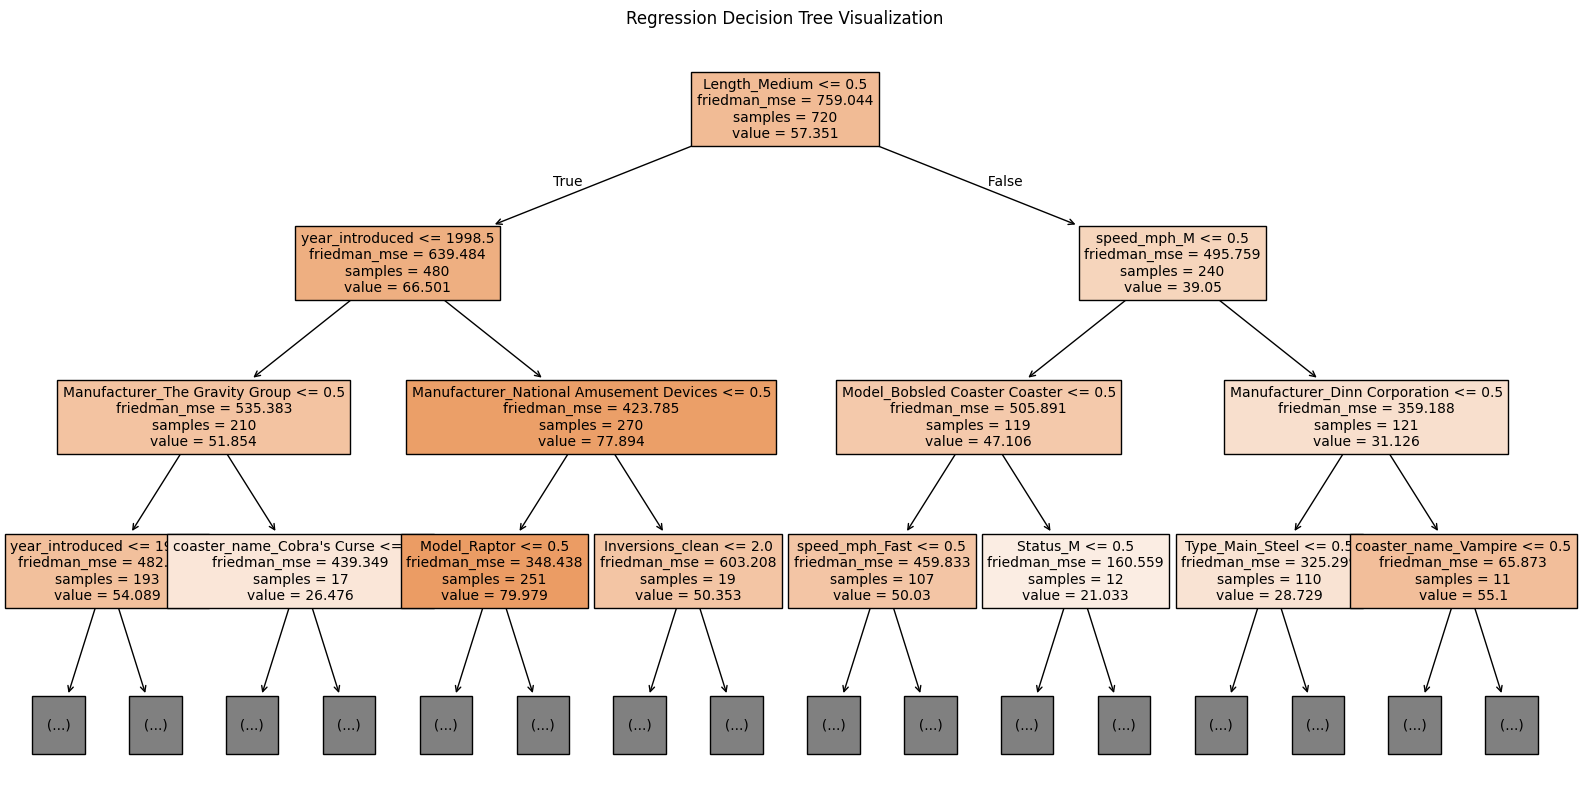

In [434]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot decision tree for regression
plt.figure(figsize=(20, 10))  
plot_tree(best_model, 
          filled=True, 
          feature_names=train.columns,  
          fontsize=10,  
          max_depth=3)  
plt.title("Regression Decision Tree Visualization")
plt.show()

### Initial Training Predictions

In [435]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the training set
y_train_pred_cv = best_model.predict(X_train)
# train_full['predictions'] = y_train_pred_cv

# Calculate MAE
mae_train_cv = mean_absolute_error(y_train, y_train_pred_cv)

# Calculate MAPE 
mape_train_cv = mean_absolute_percentage_error(y_train, y_train_pred_cv)

print("MAE for Training data:", mae_train_cv)
print("MAPE for Training Data: ", mape_train_cv)

MAE for Training data: 12.616937299861638
MAPE for Training Data:  0.4894938255801239


In [377]:
# pd.set_option('display.max_rows', 10)
# train_full.head(100)

### Validation Predictions using Best Model

In [436]:
# Make predictions on the validation set
y_valid_pred_cv = best_model.predict(X_valid)

# valid_full['predictions'] = y_valid_pred_cv

In [437]:
# Calculate MAE for validation data
mae_valid_cv = mean_absolute_error(y_valid, y_valid_pred_cv)

# Calculate MAPE 
mape_valid_cv = mean_absolute_percentage_error(y_valid, y_valid_pred_cv)

print("MAE for Validation data:", mae_valid_cv)
print("MAPE for Validation Data: ", mape_valid_cv)

MAE for Validation data: 12.561723042747602
MAPE for Validation Data:  0.6242164242679473


In [234]:
# y_test_pred_cv = best_model.predict(X_test)

# df['predictions'] = pd.concat([pd.Series(y_train_pred_cv), pd.Series(y_valid_pred_cv), pd.Series(y_test_pred_cv)], axis=0).reset_index(drop=True)

- Recombining training and validation sets

In [438]:
train_valid = pd.concat([train, valid], axis=0)

X_train_valid = train_valid.drop("coaster_rating", axis=1)
y_train_valid = train_valid["coaster_rating"]

### Fit Best Model on Combined Train / Validation

In [439]:
best_model.fit(X_train_valid, y_train_valid)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

### Test Predictions

In [440]:
y_test_pred_cv = best_model.predict(X_test)

In [441]:
# Calculate MAE for test data
mae_test_cv = mean_absolute_error(y_test, y_test_pred_cv)

# Calculate MAPE 
mape_test_cv = mean_absolute_percentage_error(y_test, y_test_pred_cv)

print("MAE for Test data:", mae_test_cv)
print("MAPE for Test Data: ", mape_test_cv)

MAE for Test data: 14.290419974421843
MAPE for Test Data:  0.46610903279468024


- Check Actual and Predicted Values

In [442]:
import pandas as pd
import numpy as np

# Create a DataFrame with the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_cv
})
pd.set_option('display.max_rows', None)

print(comparison_df)


comparison_df['APE'] = np.abs((comparison_df['Actual'] - comparison_df['Predicted']) / comparison_df['Actual']) * 100
mape = comparison_df['APE'].mean()

print(f"MAPE: {mape}")

     Actual  Predicted
103    66.4  77.759512
58     93.6  91.085333
177    87.4  56.875269
443    13.7  24.056863
537    22.0  24.056863
229    41.6  24.056863
582    39.3  31.616667
504    76.4  56.875269
12     90.9  77.759512
392    99.1  91.085333
788    80.6  77.759512
525    65.9  51.824576
3      41.8  56.875269
243    96.4  77.759512
589    90.7  91.085333
148    57.7  58.236585
321    10.1  77.759512
841    23.4  58.236585
115    69.0  51.824576
403    86.8  77.759512
303    57.5  58.236585
575    57.0  51.824576
235    15.0  25.473684
70     37.7  77.759512
802    22.7  61.900000
804    46.5  56.875269
481    52.6  43.000000
762    64.7  77.759512
268    93.0  91.085333
820    62.6  53.681818
701    50.0  36.789655
662     6.9  24.056863
873    95.2  77.759512
503    28.0  35.533333
690    99.0  91.085333
345    76.1  51.824576
617    60.9  51.824576
142    86.6  77.759512
661    12.5  24.056863
612    53.0  24.056863
334    59.0  77.759512
410    96.4  91.085333
842    79.7

### Feature Importances
- Get top 20 feature importances and plot them

                                Feature  Importance
737                        Length_Short    0.333948
0                       year_introduced    0.278003
896                  Manufacturer_Other    0.064709
977                      speed_mph_Slow    0.045396
975                      speed_mph_Fast    0.038653
905                 Manufacturer_Vekoma    0.037213
939                           Model_SLC    0.033914
976                         speed_mph_M    0.029841
912                     Model_Boomerang    0.026438
889             Manufacturer_Gerstlauer    0.020186
972                      Type_Main_Wood    0.018811
883         Manufacturer_Arrow Dynamics    0.014302
1                      Inversions_clean    0.013064
880                      Status_Removed    0.013052
879                    Status_Operating    0.008244
89      coaster_name_Colorado Adventure    0.007611
138          coaster_name_Dragon's Fury    0.005664
804  Location_Knoebels Amusement Resort    0.005139
678         

<Figure size 1000x600 with 0 Axes>

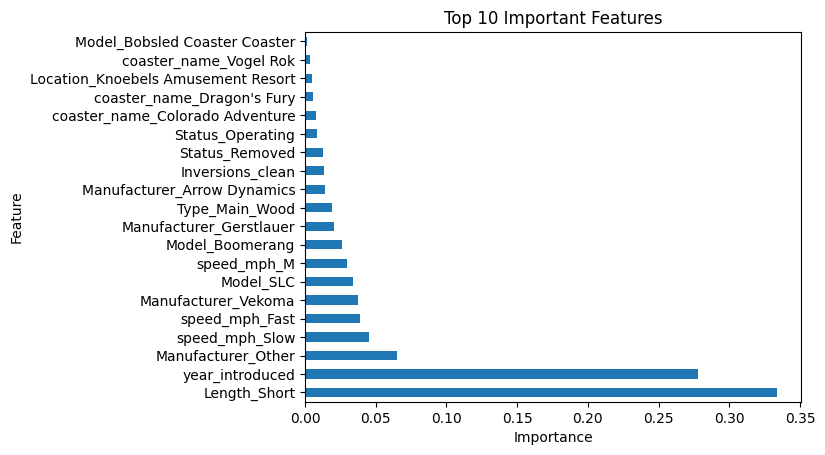

In [443]:
importances = best_model.feature_importances_

feature_names = X_train_valid.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance 
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top 20 
print(importances_df.head(20))

plt.figure(figsize=(10, 6))
importances_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()